# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


## 1.1 Reading Data

In [0]:
!curl --header "Host: doc-0k-b8-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/folders/1E_8G-TVK8ZGb25OgytJ7NOV98pkKcmmN" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi=01431468197101903198|1570449600000|cotpt30lmc6odavvf2qbvlvdnhob00fo; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0k-b8-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/t60k4amm9rl8c75gc4q0f03mbof5s9bs/1570449600000/01431468197101903198/01431468197101903198/1aBvtzZJ2_WRrX8j8toIr8E10URWn6qgg?e=download" -o "Copy of train_data.csv" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  191M    0  191M    0     0   156M      0 --:--:--  0:00:01 --:--:--  156M


In [0]:
!curl --header "Host: doc-0o-b8-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/folders/1E_8G-TVK8ZGb25OgytJ7NOV98pkKcmmN" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi=01431468197101903198|1570449600000|cotpt30lmc6odavvf2qbvlvdnhob00fo; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0o-b8-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/agsoutee5rjjt7bg7khhi0vd1mflmhc0/1570449600000/01431468197101903198/01431468197101903198/1NYzoGBgQORqKyXs3T0Lsd_qcPverkM3o?e=download" -o "Copy of resources.csv" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121M    0  121M    0     0  92.9M      0 --:--:--  0:00:01 --:--:-- 92.9M


In [0]:
project_data = pd.read_csv('Copy of train_data.csv')
resource_data = pd.read_csv('Copy of resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
project_data["project_essay_2"].map(str) + \
project_data["project_essay_3"].map(str) + \
project_data["project_essay_4"].map(str)

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved' ])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

## 1.3 Text preprocessing

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:26<00:00, 1883.38it/s]


In [0]:
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:19<00:00, 1882.06it/s]


In [0]:
from tqdm import tqdm
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:12<00:00, 1863.63it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
from tqdm import tqdm 
preprocessed_title_train = []
for sentence in tqdm(X_train['project_title'].values):
  sent=decontracted(sentence)
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\"',' ')
  sent=sent.replace('\\n',' ')
  sent=re.sub('[^A-Za-z0-9]+',' ',sent)
  sent=' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_title_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 42009.57it/s]


In [0]:
from tqdm import tqdm 
preprocessed_title_test = []
for sentence in tqdm(X_test['project_title'].values):
  sent=decontracted(sentence)
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\"',' ')
  sent=sent.replace('\\n',' ')
  sent=re.sub('[^A-Za-z0-9]+',' ',sent)
  sent=' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_title_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 42294.54it/s]


In [0]:
from tqdm import tqdm 
preprocessed_title_cv = []
for sentence in tqdm(X_cv['project_title'].values):
  sent=decontracted(sentence)
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\"',' ')
  sent=sent.replace('\\n',' ')
  sent=re.sub('[^A-Za-z0-9]+',' ',sent)
  sent=' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_title_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 41686.52it/s]


## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### one hot vector for clean categories of Projects (train,test,cv)

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_train = vectorizer.fit_transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix of train data after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix of test data after one hot encodig ",categories_one_hot_test.shape)
print("Shape of matrix of cv data after one hot encodig ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of train data after one hot encodig  (49041, 9)
Shape of matrix of test data after one hot encodig  (36052, 9)
Shape of matrix of cv data after one hot encodig  (24155, 9)


### one hot vector for clean subcategories (train ,test,cv)

In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer.fit_transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix of train data after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of matrix of test data after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of matrix of cv data after one hot encodig ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of train data after one hot encodig  (49041, 30)
Shape of matrix of test data after one hot encodig  (36052, 30)
Shape of matrix of cv data after one hot encodig  (24155, 30)


#### One hot encode- school states

In [0]:
my_counter= Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [0]:
school_state_cat_dict=dict(my_counter)
sorted_school_state_cat_dict=dict(sorted(school_state_cat_dict.items(), key=lambda kv : kv[1]))

In [0]:
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())
                             
state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
state_one_hot_test = vectorizer.transform(X_test['school_state'].values)
state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)


print("shape of matrix of train data after one hot encoding",state_one_hot_train.shape )
print("shape of matrix of test data after one hot encoding",state_one_hot_test.shape ) 
print("shape of matrix of cv data after one hot encoding",state_one_hot_cv.shape )


['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
shape of matrix of train data after one hot encoding (49041, 51)
shape of matrix of test data after one hot encoding (36052, 51)
shape of matrix of cv data after one hot encoding (24155, 51)


#### One hot encode- teacher prefix

In [0]:
my_counter= Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix=str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [0]:
teacher_prefix_cat_dict= dict(my_counter)
sorted_teacher_prefix_cat_dict= dict(sorted(teacher_prefix_cat_dict.items(),key= lambda kv :kv[1]))

In [0]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype(str))
print(vectorizer.get_feature_names())
                             
teacher_prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype(str))
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype(str))
teacher_prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype(str))


print("shape of matrix of train data after one hot encoding",teacher_prefix_one_hot_train.shape )
print("shape of matrix of test data after one hot encoding",teacher_prefix_one_hot_test.shape )
print("shape of matrix of cv data after one hot encoding",teacher_prefix_one_hot_cv.shape )



['nan', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
shape of matrix of train data after one hot encoding (49041, 6)
shape of matrix of test data after one hot encoding (36052, 6)
shape of matrix of cv data after one hot encoding (24155, 6)


#### One hot encode- project_grade_category

In [0]:
my_counter= Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())


In [0]:
project_grade_cat_dict= dict(my_counter)
sorted_project_grade_cat_dict=dict(sorted(project_grade_cat_dict.items(), key= lambda kv :kv [1]))

In [0]:
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())
                             
project_grade_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)
project_grade_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values)


print("shape of matrix of train data after one hot encoding",project_grade_one_hot_train.shape )
print("shape of matrix of test data after one hot encoding",project_grade_one_hot_test.shape )
print("shape of matrix of cv data after one hot encoding",project_grade_one_hot_cv.shape )


['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
shape of matrix of train data after one hot encoding (49041, 5)
shape of matrix of test data after one hot encoding (36052, 5)
shape of matrix of cv data after one hot encoding (24155, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

### Essay

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (49041, 12041)


In [0]:

text_bow_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_bow_test.shape)

Shape of matrix after one hot encodig  (36052, 12041)


In [0]:
text_bow_cv = vectorizer.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encodig ",text_bow_cv.shape)

Shape of matrix after one hot encodig  (24155, 12041)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

### title

In [0]:
vectorizer = CountVectorizer(min_df=10)
title_bow_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix of train data after one hot encoding ",title_bow_train.shape)

Shape of matrix of train data after one hot encoding  (49041, 2002)


In [0]:
title_bow_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 2002)


In [0]:
title_bow_cv = vectorizer.transform(preprocessed_title_cv)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 2002)


#### 1.5.2.2 TFIDF vectorizer

### Essay

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000) #Considering top 5000 features
vectorizer.fit(preprocessed_essays_train)
text_tfidf_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix of train data after one hot encodig ",text_tfidf_train.shape)

Shape of matrix of train data after one hot encodig  (49041, 5000)


In [0]:

text_tfidf_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix of test data after one hot encodig ",text_tfidf_test.shape)

Shape of matrix of test data after one hot encodig  (36052, 5000)


In [0]:
text_tfidf_cv = vectorizer.transform(preprocessed_essays_cv)
print("Shape of matrix of cv data after one hot encodig ",text_tfidf_cv.shape)

Shape of matrix of cv data after one hot encodig  (24155, 5000)


#### TFIDF Vectorizer on `project_title`

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix of train data after one hot encodig ",title_tfidf_train.shape)

Shape of matrix of train data after one hot encodig  (49041, 2002)


In [0]:
title_tfidf_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix of test data after one hot encodig ",title_tfidf_test.shape)

Shape of matrix of test data after one hot encodig  (36052, 2002)


In [0]:
title_tfidf_cv = vectorizer.transform(preprocessed_title_cv)
print("Shape of matrix of test data after one hot encodig ",title_tfidf_cv.shape)

Shape of matrix of test data after one hot encodig  (24155, 2002)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
!curl --header "Host: doc-04-b8-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/folders/1daAsfC6iF_WdH-rhn9tiP1g-y7TfbhN5" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi=01431468197101903198|1570168800000|7p4miu24bdlb4t6c6is7csih5ev8cv6c; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-04-b8-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/5f2fg2tkvbiroaqgtet0b4m3okg9fvo8/1570168800000/01431468197101903198/01431468197101903198/1_WM7BhGd4C1fz38VzJmozQpPLJF6KY2L?e=download" -o "glove.42B.300d.txt" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [0]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model


In [0]:
model = loadGloveModel('glove.42B.300d.txt')


0it [00:00, ?it/s]

Loading Glove Model
Done. 0  words loaded!


In [0]:
words = []
for i in preprocessed_essays_train:
    words.extend(i.split(' '))



In [0]:
print("all the words in the coupus", len(words))


all the words in the coupus 6768689


In [0]:
words = set(words)
print("the unique words in the coupus", len(words))


the unique words in the coupus 41148


In [0]:
inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")


The number of words that are present in both glove vectors and our coupus 0 ( 0.0 %)


In [0]:
words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


word 2 vec length 0


In [0]:
try:
    import dill as pickle
except ImportError:
    import pickle


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### train essays

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 44155.75it/s]

49041
300


### test essays

In [0]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 43631.45it/s]

36052
300


#### Using Pretrained Models: AVG W2V on `project_title`

In [0]:
avg_w2v_vectors_title_train=[];
for sentence in tqdm(preprocessed_title_train):
    vector= np.zeros(300)
    cnt_words=0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:00<00:00, 216129.54it/s]

49041
300


### test

In [0]:
avg_w2v_vectors_title_test=[];
for sentence in tqdm(preprocessed_title_test):
    vector= np.zeros(300)
    cnt_words=0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 210576.44it/s]

36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### train

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 43429.23it/s]

49041
300


### test

In [0]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 41999.94it/s]

36052
300


### cv

In [0]:
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 39831.28it/s]

24155
300


In [0]:
# Similarly you can vectorize for title also

#### Using Pretrained Models: TFIDF weighted W2V on `project_title`


### train

In [0]:
tfidf_w2v_vectors_title_train = [];  
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:00<00:00, 222169.15it/s]

49041
300


### test

In [0]:
tfidf_w2v_vectors_title_test = [];  
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 219149.98it/s]

36052
300


### cross-validation

In [0]:
tfidf_w2v_vectors_title_cv = [];  
for sentence in tqdm(preprocessed_title_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 216019.15it/s]

24155
300


## Vectorizing numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()


In [0]:
from sklearn.preprocessing import Normalizer 
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: # array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample
X_train = pd.merge(X_train, price_data, on='id', how='left')


normalizer.fit(X_train['price'].values.reshape(-1,1))
price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
print("After vectorizations")
print(price_train.shape, y_train.shape) 

print("="*100)

After vectorizations
(49041, 1) (49041,)


In [0]:
X_test = pd.merge(X_test, price_data, on='id', how='left')


In [0]:
from sklearn.preprocessing import Normalizer 
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: # array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample


price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))
print("After vectorizations")
print(price_test.shape, y_test.shape) 

print("="*100)

After vectorizations
(36052, 1) (36052,)


In [0]:
X_cv = pd.merge(X_cv, price_data, on='id', how='left')


In [0]:
from sklearn.preprocessing import Normalizer 
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: # array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample


price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
print("After vectorizations")
print(price_cv.shape, y_cv.shape) 

print("="*100)

After vectorizations
(24155, 1) (24155,)


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

# set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)


In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from scipy.sparse import hstack


In [0]:
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,state_one_hot_train, project_grade_one_hot_train,teacher_prefix_one_hot_train, price_train , title_bow_train, text_bow_train)).tocsr()

In [0]:
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,state_one_hot_test, project_grade_one_hot_test,teacher_prefix_one_hot_test, price_test, title_bow_test, text_bow_test)).tocsr()

In [0]:
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,state_one_hot_cv, project_grade_one_hot_cv,teacher_prefix_one_hot_cv, price_cv, title_bow_cv, text_bow_cv)).tocsr()

In [0]:
print("Final Data matrix") #Printing shape of all 3 matrices
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 14145) (49041,)
(24155, 14145) (24155,)
(36052, 14145) (36052,)


## A) Find the best hyper parameter which results in the maximum AUC value

In [0]:
def batch_predict(clf, data):
          # In case of roc_auc_score(y_true, y_score) the y_score should be probability estimates of the positive class
          # not the predicted outputs for the positive class
          #Predicting outputs in batches
          y_data_pred = []
          tr_loop = data.shape[0] - data.shape[0]%1000
          # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000 # in this for loop we will iterate unti the last 1000 multiplier
          for i in range(0, tr_loop, 1000):
                  y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])# we will be predicting for the last data points y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
          y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
          return y_data_pred

In [0]:
X_tr.shape

(49041, 14145)

100%|██████████| 5/5 [27:15<00:00, 327.16s/it]


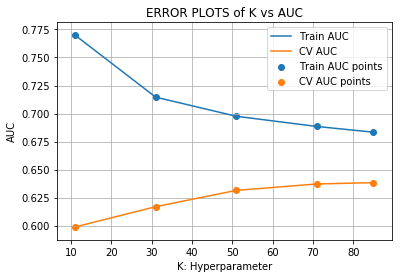

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes] True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = [] 
cv_auc = []
a = []
b = []
K = [ 11, 31, 51, 71,85]
for i in tqdm(K):
      neigh = KNeighborsClassifier(n_neighbors=i) 
      neigh.fit(X_tr, y_train)
      y_train_pred = batch_predict(neigh, X_tr)
      y_cv_pred = batch_predict(neigh, X_cr)
      # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the posi tive class
      # not the predicted outputs
      train_auc.append(roc_auc_score(y_train,y_train_pred)) 
      cv_auc.append(roc_auc_score(y_cv, y_cv_pred)) 
      a.append(y_train_pred)
      b.append(y_cv_pred)
plt.plot(K, train_auc, label='Train AUC') 
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: Hyperparameter") 
plt.ylabel("AUC")
plt.title("ERROR PLOTS of K vs AUC") 
plt.grid()
plt.show()

In [0]:
best_k_set1 = 85 #Using plot we can deduce that it is roughly best k (Not much improvement after k=80)
print("The best k found for set 1 is ",best_k_set1)

The best k found for set 1 is  85


## B) Training model using the best hyperparameter found by our analysis


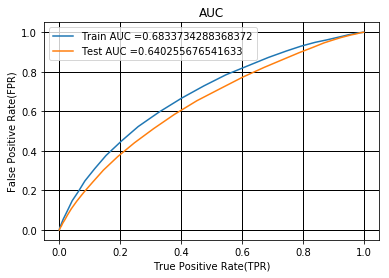

In [0]:
# Code snippet taken from here
#https://scikit- learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve 
from sklearn.metrics import roc_curve, auc
neigh = KNeighborsClassifier(n_neighbors=best_k_set1) 
neigh.fit(X_tr, y_train)
# In case of roc_auc_score(y_true, y_score) y_score should be probability estimates of the positi ve class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr) 
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()
 

## C) Plotting Confusion Matrix


In [0]:
def predict(proba, threshould, fpr, tpr):
            t = threshould[np.argmax(fpr*(1-tpr))]
            # (tpr*(1-fpr)) if we need to maximize this value tpr should be high but fpr should be low
            print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3)) 
            predictions = []
            for i in proba:
                    if i>=t: 
                            predictions.append(1)

                    else: predictions.append(0)
            return predictions

### train data

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24937936885339423 for threshold 0.776
[[ 3898  3528]
 [11292 30323]]


In [0]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24937936885339423 for threshold 0.776


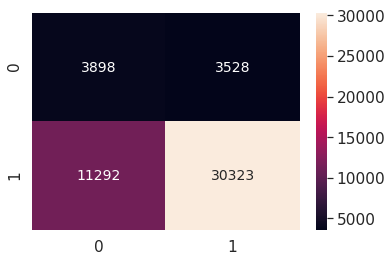

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 14}, fmt='g')

### test data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24904726170519392 for threshold 0.776
[[ 2561  2898]
 [ 8679 21914]]


In [0]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))


the maximum value of tpr*(1-fpr) 0.24904726170519392 for threshold 0.776


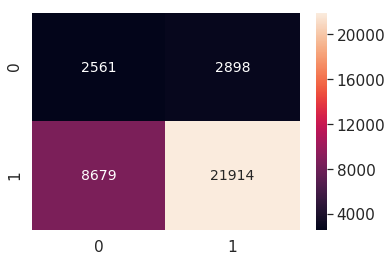

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 14}, fmt='g')


# Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

In [0]:
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,state_one_hot_train, project_grade_one_hot_train,teacher_prefix_one_hot_train, price_train , title_bow_train, text_bow_train)).tocsr()


In [0]:
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,state_one_hot_test, project_grade_one_hot_test,teacher_prefix_one_hot_test, price_test, title_bow_test, text_bow_test)).tocsr()

In [0]:
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,state_one_hot_cv, project_grade_one_hot_cv,teacher_prefix_one_hot_cv, price_cv, title_bow_cv, text_bow_cv)).tocsr()

In [0]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_cr.shape, y_cv.shape) 
print(X_te.shape, y_test.shape) 
print("="*100)

Final Data matrix
(49041, 14145) (49041,)
(24155, 14145) (24155,)
(36052, 14145) (36052,)


## A)Finding the best hyperparameter which has maximum AUC value


In [0]:
train_auc = [] 
cv_auc = []
K = [11,31,51,71,81] 
for i in tqdm(K):
          neigh = KNeighborsClassifier(n_neighbors=i) 
          neigh.fit(X_tr, y_train)
          y_train_pred = batch_predict(neigh, X_tr) 
          y_cv_pred = batch_predict(neigh, X_cr)
# In roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the p ositive class
# not the predicted outputs
          train_auc.append(roc_auc_score(y_train,y_train_pred)) 
          cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 5/5 [27:23<00:00, 328.77s/it]


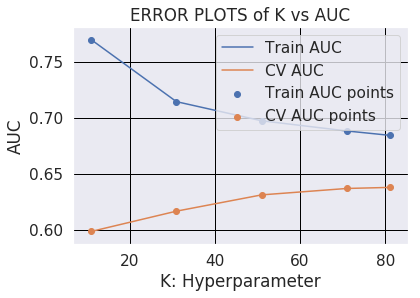

In [0]:
# references taken for gridlines https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.grid.html
plt.plot(K, train_auc, label='Train AUC') 
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points') 
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of K vs AUC") 
plt.grid(color='black', linestyle='-', linewidth=1)

In [0]:
best_k_set2 = 81 #from plot we conclude
print("The best k found for set 2 is ",best_k_set2)

The best k found for set 2 is  81


## B) Training model using best hyperparameter found in our analysis for set 2

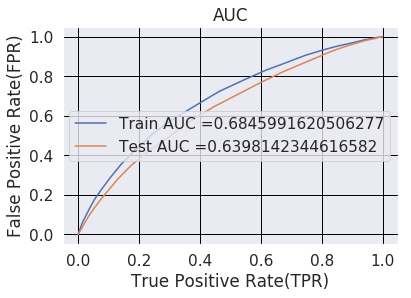

In [0]:
neigh = KNeighborsClassifier(n_neighbors=best_k_set2)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr) 
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()
 

## C) Plotting confusion matrix


### Train data


In [0]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24860860753110556 for threshold 0.778
[[ 3990  3436]
 [11521 30094]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24860860753110556 for threshold 0.778


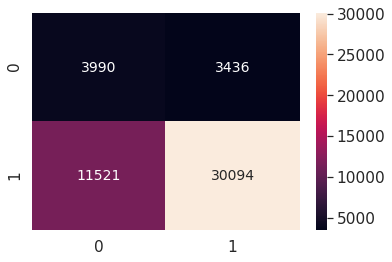

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 14}, fmt='g')

### test data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24942852816014507 for threshold 0.778
[[ 2599  2860]
 [ 8919 21674]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))


the maximum value of tpr*(1-fpr) 0.24942852816014507 for threshold 0.778


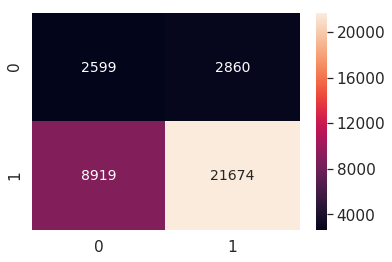

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 14}, fmt='g')


## Set 3 : categorical, numerical features + project_title(AVG W2V) + preprocessed_essay (AVG W2V)

In [0]:
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,state_one_hot_train, project_grade_one_hot_train,teacher_prefix_one_hot_train, price_train , title_bow_train, text_bow_train)).tocsr()



In [0]:
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,state_one_hot_test, project_grade_one_hot_test,teacher_prefix_one_hot_test, price_test, title_bow_test, text_bow_test)).tocsr()

In [0]:
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,state_one_hot_cv, project_grade_one_hot_cv,teacher_prefix_one_hot_cv, price_cv, title_bow_cv, text_bow_cv)).tocsr()

In [0]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_cr.shape, y_cv.shape) 
print(X_te.shape, y_test.shape) 
print("="*100)


Final Data matrix
(49041, 14145) (49041,)
(24155, 14145) (24155,)
(36052, 14145) (36052,)


## A) Finding the best hyperparameter k which gives the maximum AUC

100%|██████████| 5/5 [27:27<00:00, 328.76s/it]


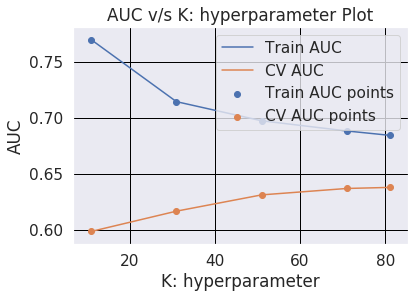

In [0]:
train_auc = [] 
cv_auc = []
K = [ 11,31, 51,71,81]
for i in tqdm(K):
            neigh = KNeighborsClassifier(n_neighbors=i) 
            neigh.fit(X_tr, y_train)
            y_train_pred = batch_predict(neigh, X_tr) 
            y_cv_pred = batch_predict(neigh, X_cr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the posi tive class
# not the predicted outputs
            train_auc.append(roc_auc_score(y_train,y_train_pred)) 
            cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(K, train_auc, label='Train AUC') 
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points') 
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot") 
plt.grid(color='black', linestyle='-', linewidth=1) 
plt.show()

In [0]:
best_k_set3 = 81
print("The best k found for set 3 is ",best_k_set3)

The best k found for set 3 is  81


## B) train the model using the best hyperparameter we found in our analysis

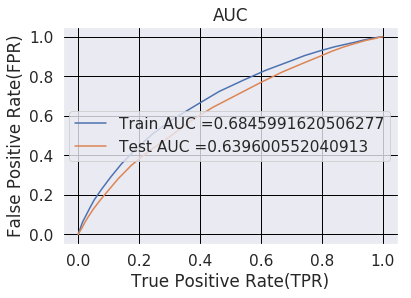

In [0]:
neigh = KNeighborsClassifier(n_neighbors=best_k_set3)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

## C) Plotting confusion Matrix

### Train data

In [0]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24860860753110556 for threshold 0.778
[[ 3990  3436]
 [11521 30094]]


In [0]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24860860753110556 for threshold 0.778


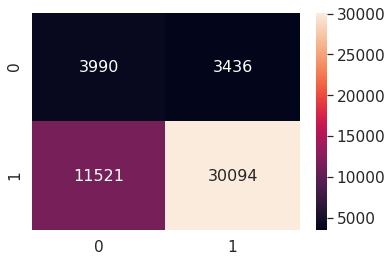

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')


### test

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24942852816014507 for threshold 0.778
[[ 2599  2860]
 [ 8919 21674]]


In [0]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24942852816014507 for threshold 0.778


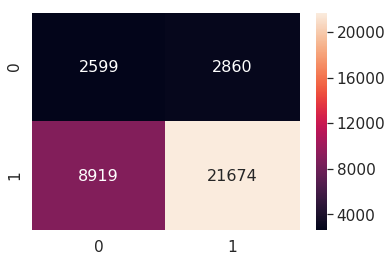

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 4 : categorical, numerical features + project_title(TFIDF W2V) + preprocessed_essay (TFIDF W2V)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,state_one_hot_train, project_grade_one_hot_train,teacher_prefix_one_hot_train, price_train , title_bow_train, text_bow_train)).tocsr()


In [0]:
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,state_one_hot_test, project_grade_one_hot_test, price_test,teacher_prefix_one_hot_test, title_bow_test, text_bow_test)).tocsr()

In [0]:
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,state_one_hot_cv, project_grade_one_hot_cv,teacher_prefix_one_hot_cv, price_cv, title_bow_cv, text_bow_cv)).tocsr()

In [0]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_cr.shape, y_cv.shape) 
print(X_te.shape, y_test.shape) 
print("="*100)

Final Data matrix
(49041, 14145) (49041,)
(24155, 14145) (24155,)
(36052, 14145) (36052,)


## A) finding the best hyperparameter which gives the maximum AUC


100%|██████████| 5/5 [27:56<00:00, 335.91s/it]


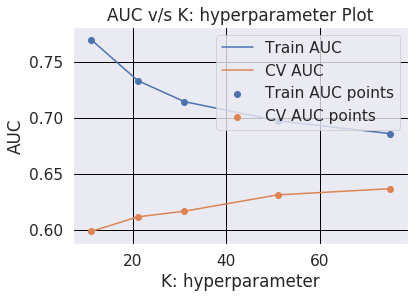

In [0]:
train_auc = [] 
cv_auc = []
             
cv_auc = []
K = [11,21, 31, 51,75]
for i in tqdm(K):
            neigh = KNeighborsClassifier(n_neighbors=i) 
            neigh.fit(X_tr, y_train)
            y_train_pred = batch_predict(neigh, X_tr)
            y_cv_pred = batch_predict(neigh, X_cr)
#In case of roc_auc_score(y_true, y_score) y_score should be prob estimatate #of positive labelled class and not the predicted output 
            train_auc.append(roc_auc_score(y_train,y_train_pred)) 
            cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(K, train_auc, label='Train AUC') 
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points') 
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot") 
plt.grid(color='black', linestyle='-', linewidth=1) 
plt.show()

In [0]:
best_k_set4 = 75
print("The best k found for set 4 is" ,best_k_set4)

The best k found for set 4 is 75


##training hyperparameter value we got in our analysis

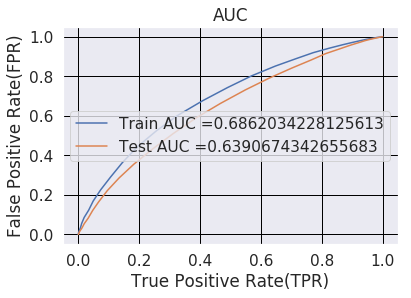

In [0]:
# code snippet taken from https://scikit- learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
neigh = KNeighborsClassifier(n_neighbors=best_k_set4)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr) 
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1) 
plt.show()

## Plotting the confusion matrix

### train

In [0]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499006990165431 for threshold 0.773
[[ 3787  3639]
 [10710 30905]]


In [0]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2499006990165431 for threshold 0.773


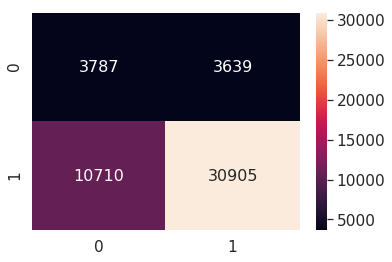

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')


### test data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24889458063055675 for threshold 0.787
[[ 2911  2548]
 [10328 20265]]


In [0]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24889458063055675 for threshold 0.787


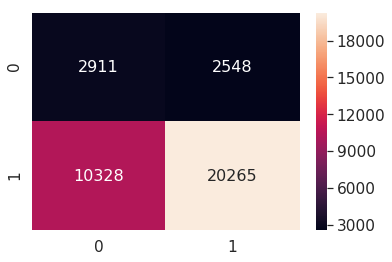

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

## 2.5 Feature selection with `SelectKBest`

In [0]:
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,state_one_hot_train, project_grade_one_hot_train,teacher_prefix_one_hot_train, price_train , title_bow_train, text_bow_train)).tocsr()


In [0]:
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,state_one_hot_test, project_grade_one_hot_test, price_test,teacher_prefix_one_hot_test, title_bow_test, text_bow_test)).tocsr()

In [0]:
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,state_one_hot_cv, project_grade_one_hot_cv,teacher_prefix_one_hot_cv, price_cv, title_bow_cv, text_bow_cv)).tocsr()

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
sel=SelectKBest(chi2,k=2000).fit(X_tr,y_train) 
X_tr_new1=sel.transform(X_tr) 
X_te_new1=sel.transform(X_te) 
X_cr_new1=sel.transform(X_cr)

In [0]:
print("Final Data matrix") 
print(X_tr_new1.shape, y_train.shape) 
print(X_cr_new1.shape, y_cv.shape) 
print(X_te_new1.shape, y_test.shape) 
print("="*100)

Final Data matrix
(49041, 2000) (49041,)
(24155, 2000) (24155,)
(36052, 2000) (36052,)


### A) Finding best hyperparameter using best 2000 features on set2

In [0]:
train_auc = [] 
cv_auc = []
K = [11, 31,51 ,71,91]
for i in tqdm(K):
          neigh = KNeighborsClassifier(n_neighbors=i)
          neigh.fit(X_tr_new1, y_train)
          y_train_pred = batch_predict(neigh, X_tr_new1) 
          y_cv_pred = batch_predict(neigh, X_cr_new1)
          # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the posi tive class
          # not the predicted outputs
          train_auc.append(roc_auc_score(y_train,y_train_pred)) 
          cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 5/5 [22:10<00:00, 266.89s/it]


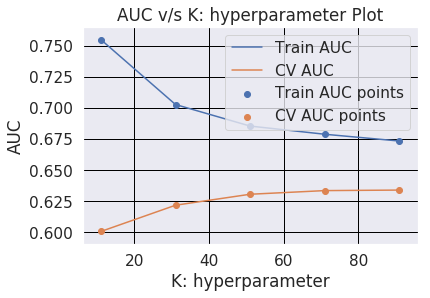

In [0]:
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points') 
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid(color='black', linestyle='-', linewidth=1) 
plt.show()

In [0]:
best_k_set5 =91
#best k found using grid search cv when using 2000 features on set2 using tfidf 
print("The best k found using 2000 features on set2 is ",best_k_set5)


The best k found using 2000 features on set2 is  91


### B) training model using best hyperparameter we found in our analysis

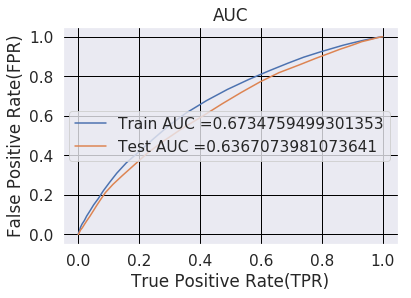

In [0]:
# https://scikit- learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
neigh = KNeighborsClassifier(n_neighbors=best_k_set5)
neigh.fit(X_tr_new1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr_new1) 
y_test_pred = batch_predict(neigh, X_te_new1)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1) 
plt.show()

### C) plotting Confusion Matrix

#### train data

In [0]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24989799707232557 for threshold 0.747
[[ 3788  3638]
 [11092 30523]]


In [0]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))


the maximum value of tpr*(1-fpr) 0.24989799707232557 for threshold 0.747


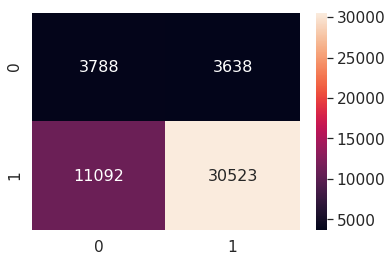

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')


#### test data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2492699411802032 for threshold 0.758
[[ 2877  2582]
 [10370 20223]]


In [0]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))


the maximum value of tpr*(1-fpr) 0.2492699411802032 for threshold 0.758


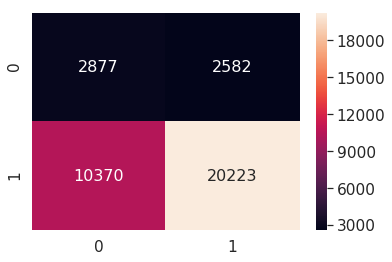

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')


## 3. Conclusions

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]
x.add_row(["BOW", "Brute",91 , 0.618])
x.add_row(["TFIDF", "Brute", 81, 0.566]) 
x.add_row(["AVG W2V", "Brute", 81, 0.594]) 
x.add_row(["TFIDF W2V", "Brute", 75, 0.603]) 
x.add_row(["TFIDF", "Top 2000", 91, 0.550])
print(x)


+------------+----------+-----------------+-------+
| Vectorizer |  Model   | Hyper Parameter |  AUC  |
+------------+----------+-----------------+-------+
|    BOW     |  Brute   |        91       | 0.618 |
|   TFIDF    |  Brute   |        81       | 0.566 |
|  AVG W2V   |  Brute   |        81       | 0.594 |
| TFIDF W2V  |  Brute   |        75       | 0.603 |
|   TFIDF    | Top 2000 |        91       |  0.55 |
+------------+----------+-----------------+-------+


## Summary about all models

1. As per analysis using K=91 with vectorizer as BOW has highest AUC followed by TFIDF W2V (K=75) with Auc of 0.603

2. Using tfidf with only 2000 features gives us least AUC among all models so going by such small features does not
solve our problem
